# Consumer Complaints Resolution

Consumer complaint resolution is important to any business. In this particular case we have been
given details consumer complaints along with whether consumer disputed with the conclusion. If
we are able to predict this , consumer likely disputed can be given more attention as to how the
complaints are handelled as well as how to convincingly convey the final conlusions to them.
Your target here is to build prediction model for column "Consumer disputed"

### The target here is to build prediction model for column "Consumer disputed"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\chakr\\Desktop\\Project data\\P1 Data\\Consumer_Complaints_train.csv")

data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [2]:
# Explore the data type and Null values
print(data.shape)
data.info()

(478421, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478421 entries, 0 to 478420
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 478421 non-null  object
 1   Product                       478421 non-null  object
 2   Sub-product                   339948 non-null  object
 3   Issue                         478421 non-null  object
 4   Sub-issue                     185796 non-null  object
 5   Consumer complaint narrative  75094 non-null   object
 6   Company public response       90392 non-null   object
 7   Company                       478421 non-null  object
 8   State                         474582 non-null  object
 9   ZIP code                      474573 non-null  object
 10  Tags                          67206 non-null   object
 11  Consumer consent provided?    135487 non-null  object
 12  Submitted via                 478421 non-null

In [3]:
data = data.drop('Complaint ID',axis=1)
data.shape

(478421, 17)

In [4]:
data['Consumer disputed?'].value_counts()

No     376990
Yes    101431
Name: Consumer disputed?, dtype: int64

In [5]:
data['Consumer disputed?'] = np.where(data['Consumer disputed?']== 'Yes', 1, 0)
data['Consumer disputed?'].value_counts()

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

In [6]:
column_list = [a for a in data]

In [7]:
# Column Name , Unique Value , Count of Nulls

for col in data.select_dtypes(['object']).columns:
    print(col,':',data[col].nunique(),':',data[col].isna().sum())

Date received : 1759 : 0
Product : 12 : 0
Sub-product : 47 : 138473
Issue : 95 : 0
Sub-issue : 68 : 292625
Consumer complaint narrative : 74019 : 403327
Company public response : 10 : 388029
Company : 3276 : 0
State : 62 : 3839
ZIP code : 25962 : 3848
Tags : 3 : 411215
Consumer consent provided? : 4 : 342934
Submitted via : 6 : 0
Date sent to company : 1706 : 0
Company response to consumer : 7 : 0
Timely response? : 2 : 0


In [8]:
# Date received - Explore Yearwise and others
# Product - Catagorical
# Sub-product - Catagorical
# Issue - Catagorical
# Sub-issue - Catagorical
# Consumer complaint narrative - Too much catagories
# Company public response - Catagorical
# Company
# State
# ZIP code
# Tags
# Consumer consent provided?
# Submitted via
# Date sent to company
# Company response to consumer
# Timely response?
# Consumer disputed?
# Complaint ID

In [9]:
def target_mean(data,feature,target,decimal=2):
    sns.countplot(data=data, y=feature, order = data[feature].value_counts().head(10).index,)
    return(data.groupby(feature).agg({target: "mean"}).sort_values(by=[target],ascending=[False]).round(decimal))

,Consumer disputed?
Company response to consumer,
Untimely response,1.00
Closed without relief,0.27
Closed with explanation,0.23
Closed,0.22
Closed with relief,0.13
Closed with non-monetary relief,0.13
Closed with monetary relief,0.11


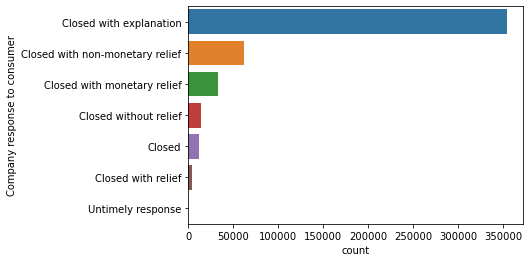

In [10]:
target_mean(data,'Company response to consumer','Consumer disputed?')

In [11]:
data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('Un'))

In [12]:
for col in data.select_dtypes(['object']).columns:
    print(col,':',data[col].nunique(),':',data[col].isna().sum())

Date received : 1759 : 0
Product : 12 : 0
Sub-product : 48 : 0
Issue : 95 : 0
Sub-issue : 69 : 0
Consumer complaint narrative : 74020 : 0
Company public response : 11 : 0
Company : 3276 : 0
State : 63 : 0
ZIP code : 25963 : 0
Tags : 4 : 0
Consumer consent provided? : 5 : 0
Submitted via : 6 : 0
Date sent to company : 1706 : 0
Company response to consumer : 7 : 0
Timely response? : 2 : 0


In [13]:
# Extract Year from date columns 
data['Date received'] = pd.to_numeric(data['Date received'].str.slice(0,4))
data['Date sent to company'] = pd.to_numeric(data['Date sent to company'].str.slice(0,4))

In [14]:
# Complain Length in terms of words
data['complain_length'] = data['Consumer complaint narrative'].str.count(' ') + 1

In [15]:
y_train = data['Consumer disputed?']
x_train = data.drop('Consumer disputed?',axis=1)
x_train.shape, y_train.shape

((478421, 17), (478421,))

In [16]:
from sklearn.model_selection import train_test_split
x_train1, x_train2 , y_train1, y_train2 =  train_test_split(x_train , y_train, test_size=0.25, random_state=42)

In [17]:
from catboost import CatBoostClassifier, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

model = CatBoostClassifier(iterations=50)
model.fit(x_train1, y_train1, cat_features=categorical_features)
test_pred = model.predict_proba(x_train2)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

Learning rate set to 0.5
0:	learn: 0.5625535	total: 313ms	remaining: 15.4s
1:	learn: 0.5235421	total: 456ms	remaining: 10.9s
2:	learn: 0.5092033	total: 595ms	remaining: 9.32s
3:	learn: 0.5040307	total: 732ms	remaining: 8.42s
4:	learn: 0.5008810	total: 869ms	remaining: 7.83s
5:	learn: 0.4993868	total: 1.01s	remaining: 7.39s
6:	learn: 0.4984684	total: 1.14s	remaining: 7.02s
7:	learn: 0.4975785	total: 1.28s	remaining: 6.7s
8:	learn: 0.4970691	total: 1.4s	remaining: 6.39s
9:	learn: 0.4966951	total: 1.54s	remaining: 6.17s
10:	learn: 0.4940164	total: 1.68s	remaining: 5.95s
11:	learn: 0.4936623	total: 1.81s	remaining: 5.73s
12:	learn: 0.4933829	total: 1.95s	remaining: 5.55s
13:	learn: 0.4930427	total: 2.07s	remaining: 5.33s
14:	learn: 0.4929735	total: 2.14s	remaining: 4.99s
15:	learn: 0.4926892	total: 2.26s	remaining: 4.8s
16:	learn: 0.4925155	total: 2.39s	remaining: 4.64s
17:	learn: 0.4924512	total: 2.52s	remaining: 4.49s
18:	learn: 0.4923095	total: 2.65s	remaining: 4.33s
19:	learn: 0.492189

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train2,test_pred[:,1])

0.6535880186694348

Text(0.5, 1.0, 'Feature Importance')

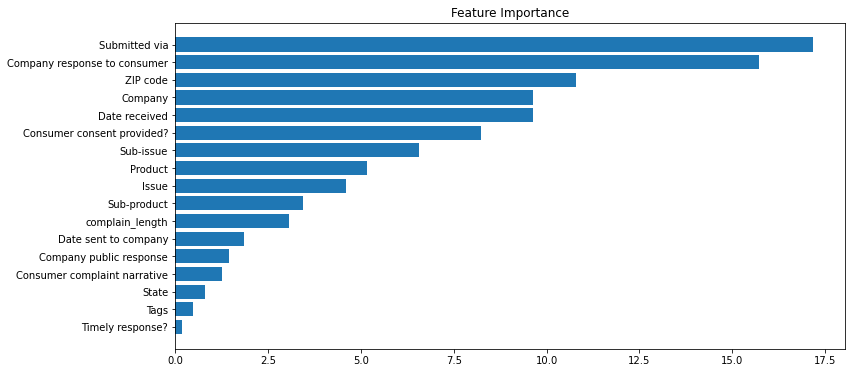

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train2.columns)[sorted_idx])
plt.title('Feature Importance')